Clean text:
 BAJOELCIELODEESPAÑADIREMOSSIACEPTOELTRESDEOCTUBRESELLAMOSNUESTROAMORPERFECTOCONELALMAENTRELAZADAYELCORAZONENCENDIDOMECASOCONELAMORDEMIVIDAMIDESTINOELEGIDO


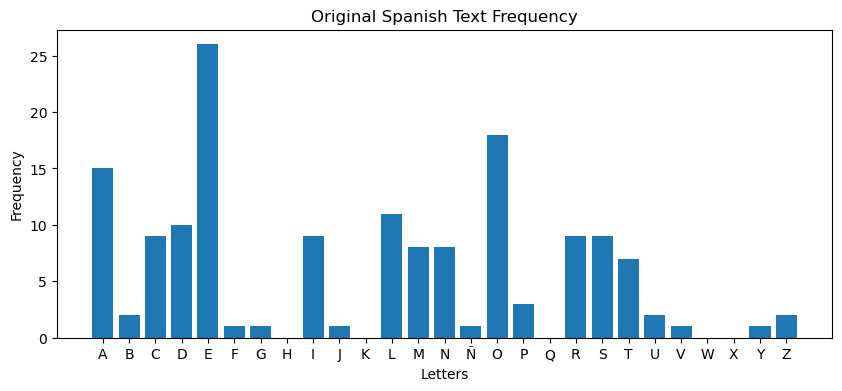

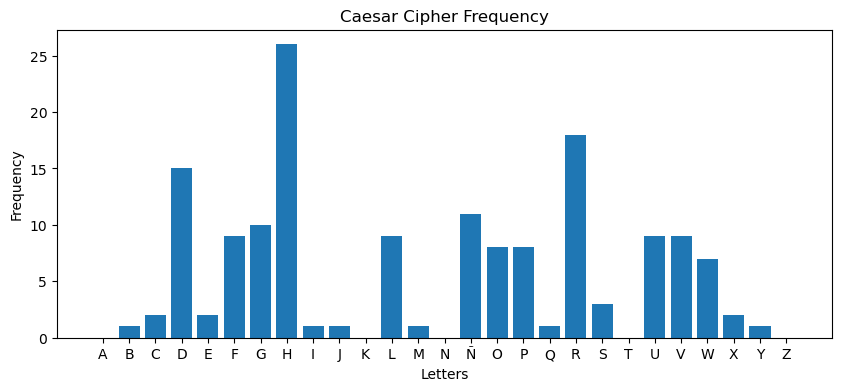

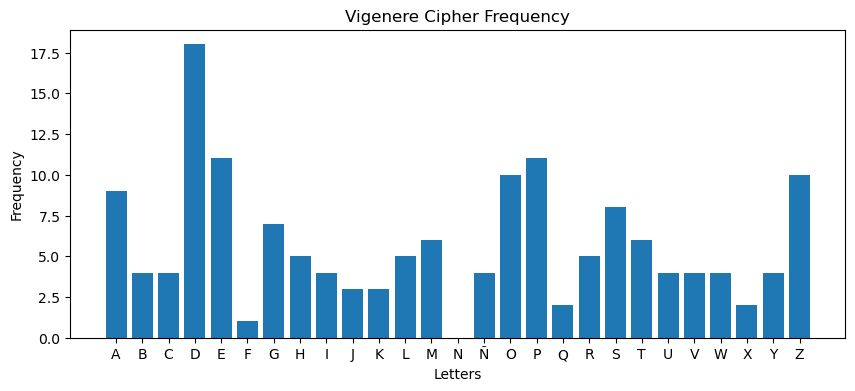

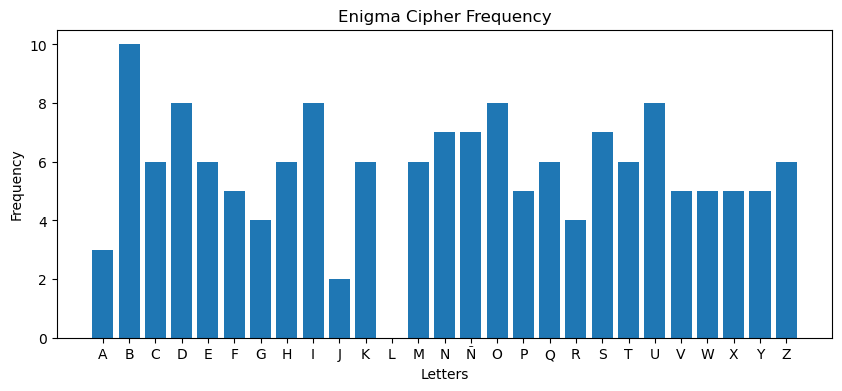

In [1]:
# ==========================================
# CRYPTOGRAPHY HOMEWORK
# ==========================================

import matplotlib.pyplot as plt
from collections import Counter

# ------------------------------------------
# 1. SPANISH ALPHABET (27 letters)
# ------------------------------------------
SPANISH_ALPHABET = "ABCDEFGHIJKLMNÑOPQRSTUVWXYZ"
ALPH_LEN = len(SPANISH_ALPHABET)


# ------------------------------------------
# 2. ORIGINAL TEXT CLEANING
# ------------------------------------------

plain = """Bajo el cielo de España diremos sí acepto,
el tres de octubre sellamos nuestro amor perfecto.
Con el alma entrelazada y el corazón encendido,
me caso con el amor de mi vida mi destino elegido."""

# Convert to uppercase
plain = plain.upper()

# Remove accents
plain = plain.replace("Á","A").replace("É","E") \
             .replace("Í","I").replace("Ó","O") \
             .replace("Ú","U").replace("Ü","U")

# Keep only letters from Spanish alphabet
plain = "".join(c for c in plain if c in SPANISH_ALPHABET)

print("Clean text:\n", plain)


# ------------------------------------------
# 3. CAESAR CIPHER
# ------------------------------------------
def caesar_encrypt(text, shift):
    result = ""
    for c in text:
        idx = (SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN
        result += SPANISH_ALPHABET[idx]
    return result

caesar = caesar_encrypt(plain, 3)


# ------------------------------------------
# 4. VIGENERE CIPHER
# ------------------------------------------
def vigenere_encrypt(text, key):
    result = ""
    key = key.upper()
    for i, c in enumerate(text):
        shift = SPANISH_ALPHABET.index(key[i % len(key)])
        idx = (SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN
        result += SPANISH_ALPHABET[idx]
    return result

vigenere = vigenere_encrypt(plain, "AMOR")


# ------------------------------------------
# 5. SIMPLE ENIGMA (Spanish Alphabet)
# ------------------------------------------

class Rotor:
    def __init__(self, wiring, notch, position='A'):
        self.wiring = wiring
        self.notch = notch
        self.position = position

    def encode_forward(self, c):
        shift = SPANISH_ALPHABET.index(self.position)
        idx = (SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN
        return self.wiring[idx]

    def encode_backward(self, c):
        shift = SPANISH_ALPHABET.index(self.position)
        idx = self.wiring.index(c)
        return SPANISH_ALPHABET[(idx - shift) % ALPH_LEN]

    def step(self):
        pos = SPANISH_ALPHABET.index(self.position)
        self.position = SPANISH_ALPHABET[(pos + 1) % ALPH_LEN]
        return self.position == self.notch


class Reflector:
    def __init__(self, wiring):
        self.wiring = wiring

    def reflect(self, c):
        return self.wiring[SPANISH_ALPHABET.index(c)]


# 27-letter rotor wirings (must be permutations!)
rotor_I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCÑJ", notch='Q')
rotor_II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOÑE", notch='E')
rotor_III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQOÑ", notch='V')

reflector_B = Reflector("YRUHQSLDPXNGOKMIEBFZCWVJATÑ")

def enigma_encrypt(text):
    encrypted = []
    for c in text:

        if rotor_III.step():
            if rotor_II.step():
                rotor_I.step()

        c = rotor_III.encode_forward(c)
        c = rotor_II.encode_forward(c)
        c = rotor_I.encode_forward(c)

        c = reflector_B.reflect(c)

        c = rotor_I.encode_backward(c)
        c = rotor_II.encode_backward(c)
        c = rotor_III.encode_backward(c)

        encrypted.append(c)

    return "".join(encrypted)

enigma = enigma_encrypt(plain)


# ------------------------------------------
# 6. FREQUENCY ANALYSIS
# ------------------------------------------

def letter_freq(text):
    counts = Counter(text)
    return [counts.get(letter, 0) for letter in SPANISH_ALPHABET]

freq_plain = letter_freq(plain)
freq_caesar = letter_freq(caesar)
freq_vigenere = letter_freq(vigenere)
freq_enigma = letter_freq(enigma)


# ------------------------------------------
# 7. HISTOGRAMS
# ------------------------------------------

labels = list(SPANISH_ALPHABET)

def plot_hist(freq, title, filename):
    plt.figure(figsize=(10,4))
    plt.bar(labels, freq)
    plt.title(title)
    plt.xlabel("Letters")
    plt.ylabel("Frequency")
    plt.savefig(f"../visuals/{filename}")
    plt.show()

plot_hist(freq_plain, "Original Spanish Text Frequency", "plain.png")
plot_hist(freq_caesar, "Caesar Cipher Frequency", "caesar.png")
plot_hist(freq_vigenere, "Vigenere Cipher Frequency", "vigenere.png")
plot_hist(freq_enigma, "Enigma Cipher Frequency", "enigma.png")

In [3]:
print(plain)


BAJOELCIELODEESPAÑADIREMOSSIACEPTOELTRESDEOCTUBRESELLAMOSNUESTROAMORPERFECTOCONELALMAENTRELAZADAYELCORAZONENCENDIDOMECASOCONELAMORDEMIVIDAMIDESTINOELEGIDO


In [6]:
# Caesar result
print(caesar[:40])
print(caesar[40:80])
print(caesar[80:120])
print(caesar[120:])

EDMRHÑFLHÑRGHHVSDQDGLUHORVVLDFHSWRHÑWUHV
GHRFWXEUHVHÑÑDORVPXHVWURDORUSHUIHFWRFRPH
ÑDÑODHPWUHÑDCDGDBHÑFRUDCRPHPFHPGLGROHFDV
RFRPHÑDORUGHOLYLGDOLGHVWLPRHÑHJLGR


In [8]:
# vigenere result
print(vigenere[:40])
print(vigenere[40:80])
print(vigenere[80:120])
print(vigenere[120:])

BMXGEWQZEWDUEPHHAZOUIDSDOEHZAÑSHTASCTDSK
DPDTTGPJEESCLMAGSYJVSFGGAXDJPPGWEÑIGCABV
LMZDAPBLRPZRZMRRYPZTODOQOYSECPBUIODDEÑOK
OÑDEEWODODRVMTKZDMAZDPHLIYDVLPUZDA


In [9]:
# enigma result
print(enigma[:40])
print(enigma[40:80])
print(enigma[80:120])
print(enigma[120:])

BAIBIOGZFWSHINIBEZNOIWGCTCJYQXTFHHMCOIUÑ
TUÑSÑZQZCPEMKDTÑQMSDQTUBÑVODHDOVUAKUBEFD
DNFXIZMDÑYVSRUJMSOVNBHNMSPEBCXEPWNBPSGDU
KTOCKAGBYZRRXXKWQVWPRKFHIYBYQNUÑOE


CRYPTII ENIGMA FREQUENCY:
A : 9
B : 6
C : 3
D : 4
E : 1
F : 6
G : 8
H : 7
I : 6
J : 6
K : 1
L : 2
M : 7
N : 5
Ñ : 0
O : 5
P : 7
Q : 8
R : 4
S : 12
T : 4
U : 8
V : 3
W : 10
X : 8
Y : 3
Z : 8


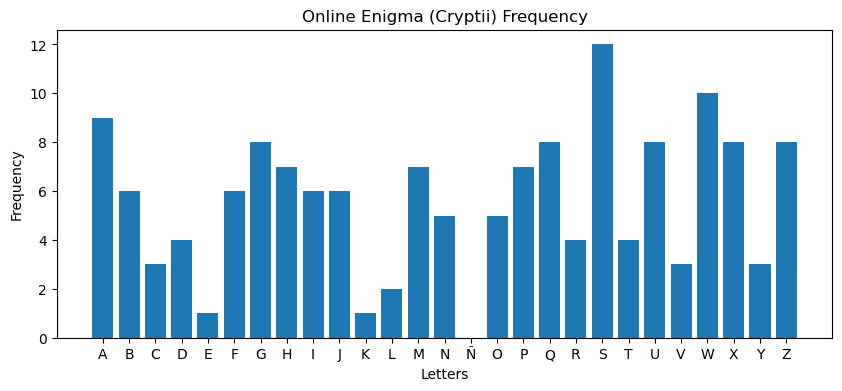

In [10]:
# ==========================================
# ONLINE ENIGMA (CRYPTII) OUTPUT FREQUENCY
# ==========================================

cryptii_enigma = """
yobsmadqaszbawpqvwjwwufgzposmiqq
jmwupbpvzssugtgssmrfsaiidazivgywdwwbhfaps
ofhimtrxsnxfuxaunppholzqwqzajezuiajlhgx
ohgxrbhztxnutxgshuncjcfxbgdnyqsqrmjkmcw
"""

# Normalize
cryptii_enigma = cryptii_enigma.upper().replace("\n", "")

# Frequency calculation
freq_cryptii = letter_freq(cryptii_enigma)

print("CRYPTII ENIGMA FREQUENCY:")
for letter, count in zip(SPANISH_ALPHABET, freq_cryptii):
    print(letter, ":", count)

# Plot and save
plot_hist(freq_cryptii,
          "Online Enigma (Cryptii) Frequency",
          "cryptii_enigma.png")